In [9]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [5]:
def get_sign(num):
    if num >= 0:
        return "+"
    return "-"

# Bisection Method

Let $f$ be a continuous function in the interval $[a, b]$, satsfying $f(a) f(b) < 0$.
Then $f$ has a root between $a$ and $b$, that is, there is a number $r$ satisfying $a < r <b$ and $f(r)=0$.

If $[a, b]$ is the starting interval, then after $n$ iterations of the bisection method, the solution interval will have length $(b-a)/2^n$.
Choosing the midpoint between the resultant interval, $[a_n, b_n]$ will be our best estimate to the true solution $r$.

Solution error:
$$
|x_c - r| 
< \frac{b-a}{2^{n+1}}
$$

## Error to $p$ decimal places

To decide how many steps to run the bisection method for in order to be correct to within so many decimal places we can use the error formula from above.

For example, let's say we want to find the root of an equation to within six correct places (we want the error to be less than $0.5 \times 10^{-p}$).

After $n$ steps, we know the error will be approximately $1/2^{n+1}$.
So we need to find an $n$ such that
$$
\frac{1}{2^{n+1}} \lt 0.5 \times 10^{-6}
$$

...solve for $n$...

In [8]:
def bisection_method(func, a, b, TOL=1.0e-3):
    assert(func(a) * func(b) < 0.0)
    
    i = 0
    a, b, c = float(a), float(b), None
    while (b-a)/2. > TOL:
        c = (a+b)/2.
        print("{:>2}) {:^9.6f} {:^9.6f} {:^9.6f}".format(i, a, c, b))
        
        if func(c)==0.0:
            return c
        if func(a) * func(c) < 0.0:
            b = c
        else:
            a = c
        i += 1
    
    return c

def bisection_method(func, a, b, TOL=1.0e-3):
    """ Bisection Method 
    
        With n + 2 function evaluations per call.
    
    Params
    ------
    func : func
        Function whose root we are looking for.
    a : float
        Lower bound for solution inerval.
    b : float
        Upper bound for solution interval.
    TOL : float (default=1.0e-3)
        Tolerance.
        
    Returns
    -------
    c: float, None
        Best estimate of the root to func.
    """
    assert(func(a) * func(b) < 0.0)
    
    i = 0
    a, b, c = float(a), float(b), None
    fa, fb = func(a), func(b)
    while (b-a)/2. > TOL:
        c = (a+b)/2.
        fc = func(c)
        sa, sc, sb = get_sign(fa), get_sign(fc), get_sign(fb)
        print("{:>2}) {:^9.6f} ({}) {:^9.6f} ({}) {:^9.6f} ({})".format(i, a, sa, c, sc, b, sb))
        
        if fc==0.0:
            return c
        if fa * fc < 0.0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc
        i += 1
    
    return c

In [9]:
f = lambda x: x**3 + x -1
c = bisection_method(f, 0, 1, TOL=1.0e-5)
print('{:.6f}'.format(c))

 0) 0.000000  (-) 0.500000  (-) 1.000000  (+)
 1) 0.500000  (-) 0.750000  (+) 1.000000  (+)
 2) 0.500000  (-) 0.625000  (-) 0.750000  (+)
 3) 0.625000  (-) 0.687500  (+) 0.750000  (+)
 4) 0.625000  (-) 0.656250  (-) 0.687500  (+)
 5) 0.656250  (-) 0.671875  (-) 0.687500  (+)
 6) 0.671875  (-) 0.679688  (-) 0.687500  (+)
 7) 0.679688  (-) 0.683594  (+) 0.687500  (+)
 8) 0.679688  (-) 0.681641  (-) 0.683594  (+)
 9) 0.681641  (-) 0.682617  (+) 0.683594  (+)
10) 0.681641  (-) 0.682129  (-) 0.682617  (+)
11) 0.682129  (-) 0.682373  (+) 0.682617  (+)
12) 0.682129  (-) 0.682251  (-) 0.682373  (+)
13) 0.682251  (-) 0.682312  (-) 0.682373  (+)
14) 0.682312  (-) 0.682343  (+) 0.682373  (+)
15) 0.682312  (-) 0.682327  (-) 0.682343  (+)
0.682327


In [10]:
# Find a root to whithin 6 correct places
f = lambda x: math.cos(x) - x
c = bisection_method(f, 0, 1, TOL=0.5e-6)
print('{:.6f}'.format(c))

 0) 0.000000  (+) 0.500000  (+) 1.000000  (-)
 1) 0.500000  (+) 0.750000  (-) 1.000000  (-)
 2) 0.500000  (+) 0.625000  (+) 0.750000  (-)
 3) 0.625000  (+) 0.687500  (+) 0.750000  (-)
 4) 0.687500  (+) 0.718750  (+) 0.750000  (-)
 5) 0.718750  (+) 0.734375  (+) 0.750000  (-)
 6) 0.734375  (+) 0.742188  (-) 0.750000  (-)
 7) 0.734375  (+) 0.738281  (+) 0.742188  (-)
 8) 0.738281  (+) 0.740234  (-) 0.742188  (-)
 9) 0.738281  (+) 0.739258  (-) 0.740234  (-)
10) 0.738281  (+) 0.738770  (+) 0.739258  (-)
11) 0.738770  (+) 0.739014  (+) 0.739258  (-)
12) 0.739014  (+) 0.739136  (-) 0.739258  (-)
13) 0.739014  (+) 0.739075  (+) 0.739136  (-)
14) 0.739075  (+) 0.739105  (-) 0.739136  (-)
15) 0.739075  (+) 0.739090  (-) 0.739105  (-)
16) 0.739075  (+) 0.739082  (+) 0.739090  (-)
17) 0.739082  (+) 0.739086  (-) 0.739090  (-)
18) 0.739082  (+) 0.739084  (+) 0.739086  (-)
19) 0.739084  (+) 0.739085  (-) 0.739086  (-)
0.739085


# Fixed-Point Iteration

A real number $r$ is a fixed point of the function $g$ if $g(r) = r$. 

Start by rewriting the problem to fit the form $g(x) = x$, then make an initial guess and iterate away until you see some convergence.
```
x[0] = <initial guess>
x[i+1] = g(x[i])
```

In [3]:
x = 0.5
for _ in range(10):
    x = math.cos(x)
    print(x)

0.8775825618903728
0.6390124941652592
0.8026851006823349
0.6947780267880062
0.7681958312820161
0.719165445942419
0.752355759421527
0.7300810631378233
0.7451203413514401
0.7350063090148431


In [4]:
def fpi(func, x0, steps):
    """ Fixed Point Iteration
    
        Computes approximate solution to g(x) = x
        
    Params
    ------
    func : func
    x0 : float
        Initial guess.
    steps : int
        Number of fpi steps.
        
    returns
    -------
    xc : float
        Approximate solution.
    """
    x = [0]*(steps+1)
    x[0] = x0
    for i in range(steps):
        x[i+1] = func(x[i])
    xc = x[steps]
    return x

In [5]:
x = fpi(math.cos, 0.5, 25)
print(x[-1])

0.7390959998357547


Find the roots to
$$
x^3 + x - 1 = 0.
$$
This equation can be rewriten as,
$$
x = 1- x^3
$$
Alternatively, the $x^3$ can be isolated,
$$
x = \left( 1 - x \right)^3
$$
Or, by adding $2x^3$ to both sides
$$
3x^3 + x = 1 + 2x^3
$$
$$
(3x^2 + 1)x = 1 + 2x^3
$$
which leads to 
$$
x = \frac{1+2x^3}{1 + 3x^2}
$$

In [6]:
x = fpi(lambda x: 1- x**3, 0.5, 12)
for i in range(len(x)):
    print("{:>2}) {:.10f}".format(i, x[i]))

 0) 0.5000000000
 1) 0.8750000000
 2) 0.3300781250
 3) 0.9640374705
 4) 0.1040541883
 5) 0.9988733768
 6) 0.0033760632
 7) 0.9999999615
 8) 0.0000001154
 9) 1.0000000000
10) 0.0000000000
11) 1.0000000000
12) 0.0000000000


In [7]:
x = fpi(lambda x: (1+2*x**3)/(1+3*x**2), 0.5, 8)
for i in range(len(x)):
    print("{:>2}) {:.10f}".format(i, x[i]))

 0) 0.5000000000
 1) 0.7142857143
 2) 0.6831797235
 3) 0.6823284233
 4) 0.6823278038
 5) 0.6823278038
 6) 0.6823278038
 7) 0.6823278038
 8) 0.6823278038


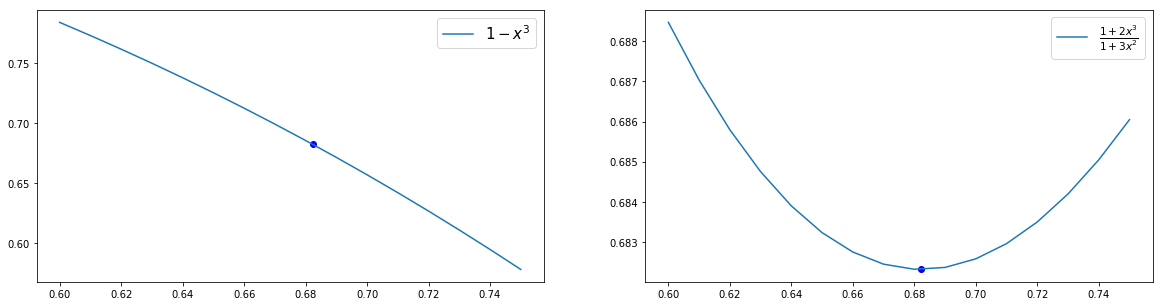

In [25]:
x = np.arange(0.6, 0.75, 0.01)
f1 = lambda x: 1- x**3
f2 = lambda x: (1+2*x**3)/(1+3*x**2)

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(0.6823278038, 0.6823278038, 'bo')
ax2.plot(0.6823278038, 0.6823278038, 'bo')
ax1.plot(x, f1(x), label=r"$1-x^3$")
ax2.plot(x, f2(x), label=r"$\frac{1+2x^3}{1+3x^2}$")

ax1.legend(prop={'size':15})
ax2.legend(prop={'size':15})
plt.show()

## Linear convergence of FPI

As you may have guesses, from looking at the graphs, the convergence has something to do with the slope, may we dare even suggest that it is in fact the slope near the fixed-point?

In fact, if the slope near the fixed-point is greater than one, then each iteration will get farther and farther away.

Let's define the error at step $i$ as $e_i = |r - x_i|$.
The following definition will actually suffice for any iterative method:
$$
\lim_{i\to\infty} \frac{e_{i+1}}{e_i} = S \lt 1
$$

If such condition holds then method is said to obey linear convergence with rate $S$, and yes! $S = |g^\prime (r)|$.

# Newton's Method

The point-slope formula for the equation of a line is
$$
y - f(x_0) = f^{\prime}(x_0)(x - x_0).
$$

If we look for an intersection point of the tangent line withteh x-axis ($y=0$),
$$
0 - f(x_0) =  f^{\prime}(x - x_0)
$$
or
$$
x = x_0 - \frac{f(x_0)}{f^{\prime}(x_0)}
$$

```
x0 # Initial guess
xnew = xi - f(xi)/fprime(xi)
```

For the sake of development we will revisit Newthon-Raphson method again when we know how to take derivatives!

# Secant Method

The tangent line from Newton's method is replaced by a line going through the last two guesses.

An approximation for the derivative at the current gess $x_i$ is,
$$
\frac{f(x_i) - f(x_{i-1})}{x_i - x_{i-1}}
$$

```
x0, x1    # Initial guesses
xnew = x - ( f(x) * f(x - xp) )/( f(x) - f(xp) )
```

# Method of False Position

# Mueller's Method

# Inverse Quadratic Interpolation

# Brent's Method